In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/heart_disease.csv')

In [63]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [64]:
df.shape

(319795, 18)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [66]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [67]:
df.duplicated().sum()

18078

In [68]:
df.drop_duplicates(inplace = True)

In [69]:
df.duplicated().sum()

0

In [70]:
df["HeartDisease"].value_counts()

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

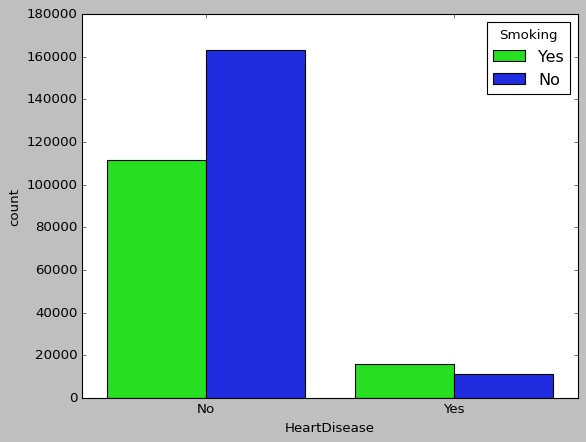

In [71]:
sns.countplot(data=df,x="HeartDisease",palette="hsv",hue="Smoking")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

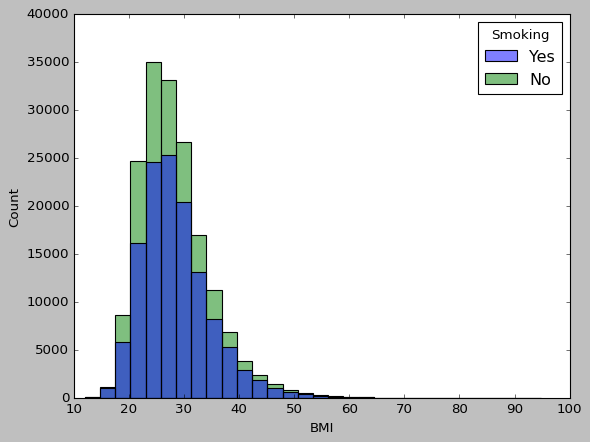

In [72]:
sns.histplot(data=df, x="BMI",bins=30,color="navy",hue="Smoking")
plt.show()

In [73]:
df["Smoking"].value_counts()

Smoking
No     174312
Yes    127405
Name: count, dtype: int64

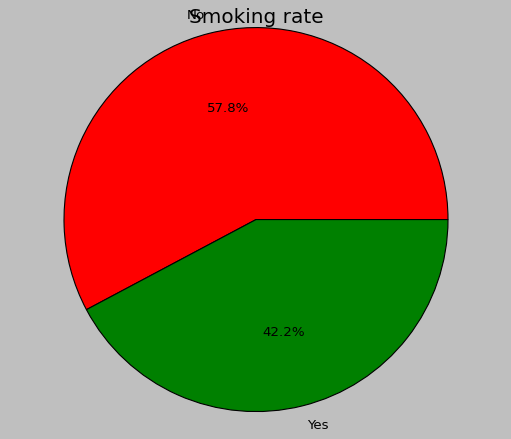

In [74]:
plt.figure(figsize=(8,6))
smoke= df['Smoking'].value_counts()
plt.pie(smoke.values, labels=smoke.index, autopct= '%1.1f%%', colors=['red','green'])
plt.axis("equal")
plt.title('Smoking rate',fontsize=18)
plt.show()

In [75]:
df["AlcoholDrinking"].value_counts()

AlcoholDrinking
No     280136
Yes     21581
Name: count, dtype: int64

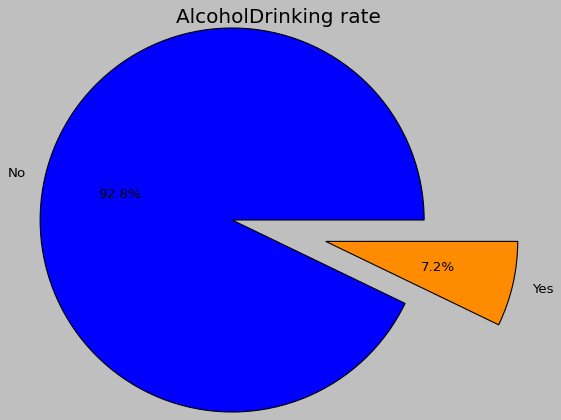

In [76]:
plt.figure(figsize=(8,6))
myexplode = [0.2, 0.3]
alcohol= df['AlcoholDrinking'].value_counts()
plt.pie(alcohol.values, labels=alcohol.index, autopct= '%1.1f%%', colors=['blue','darkorange'],explode=myexplode)
plt.axis("equal")
plt.title('AlcoholDrinking rate',fontsize=18)
plt.show()

In [77]:
df["Stroke"].value_counts()

Stroke
No     289653
Yes     12064
Name: count, dtype: int64

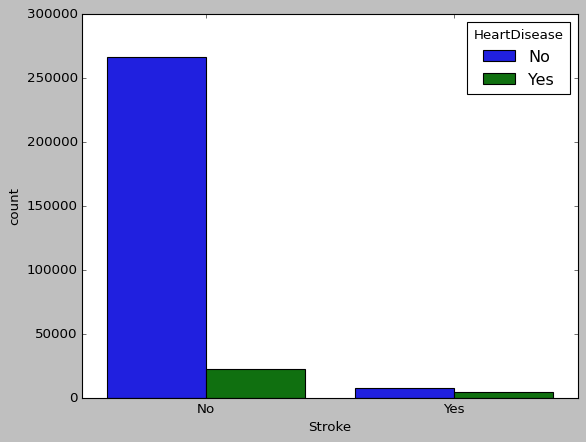

In [78]:
sns.countplot(x="Stroke",data=df,hue="HeartDisease")
plt.show()

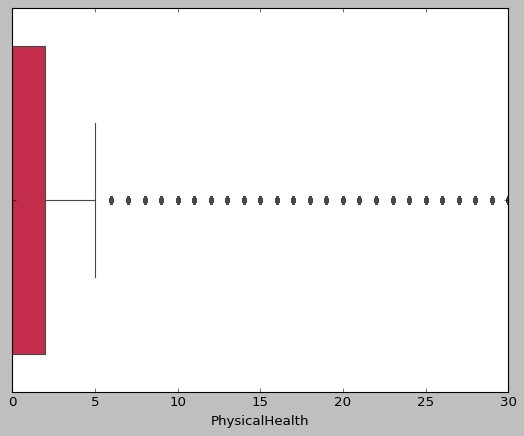

In [79]:

sns.boxplot(x=df["PhysicalHealth"],color="crimson")
plt.show()

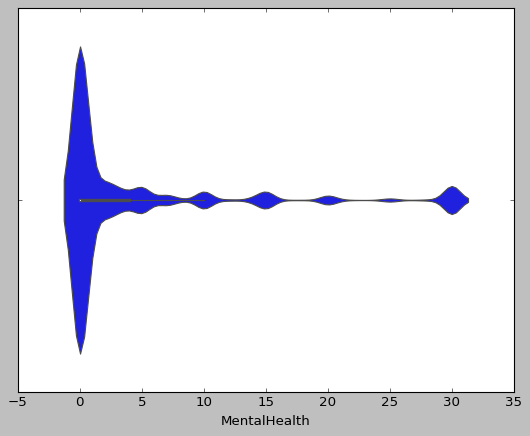

In [80]:
sns.violinplot(x=df["MentalHealth"])
plt.show()

In [81]:
df["DiffWalking"].value_counts()

DiffWalking
No     257362
Yes     44355
Name: count, dtype: int64

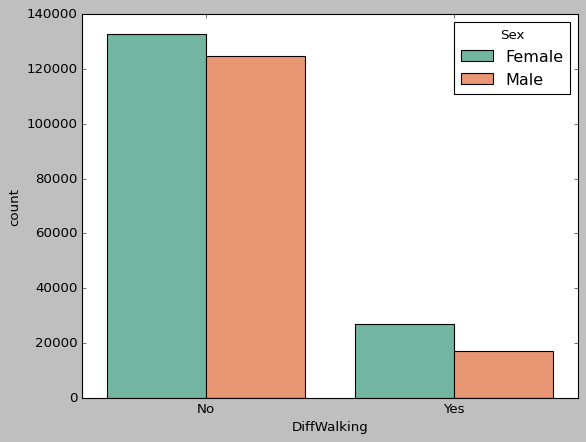

In [82]:
sns.countplot(x="DiffWalking",data=df,hue="Sex",palette="Set2")
plt.show()

In [83]:
df["AgeCategory"].value_counts()

AgeCategory
65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: count, dtype: int64

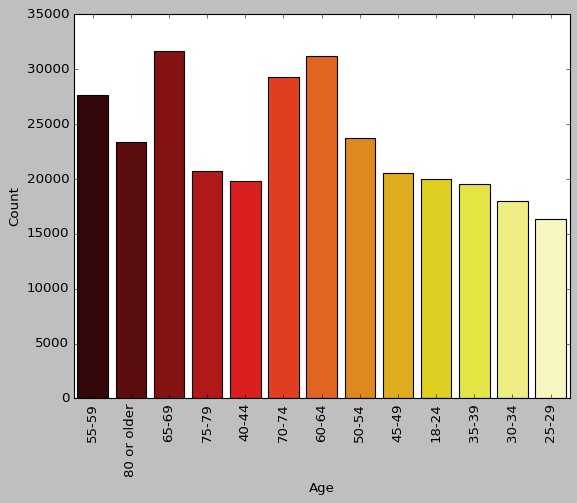

In [84]:
sns.countplot(data=df,x="AgeCategory",palette="hot")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [85]:
df['AgeCategory'] = df['AgeCategory'].replace({'80 or older': "80"})

In [86]:
df["AgeCategory"] = df["AgeCategory"].str.split("-").str[0].astype(int)

df["AgeCategory"].unique()

array([55, 80, 65, 75, 40, 70, 60, 50, 45, 18, 35, 30, 25])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


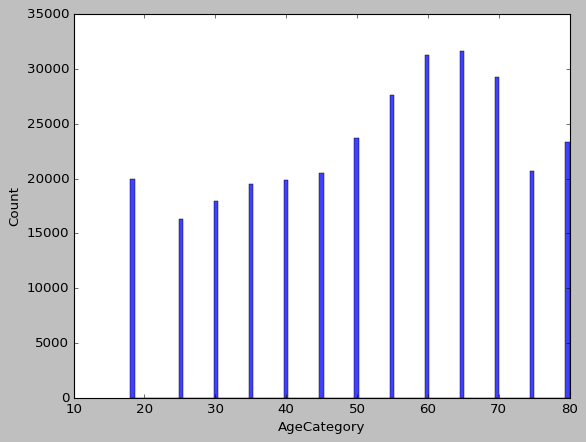

In [87]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="AgeCategory",bins=100)
plt.show()

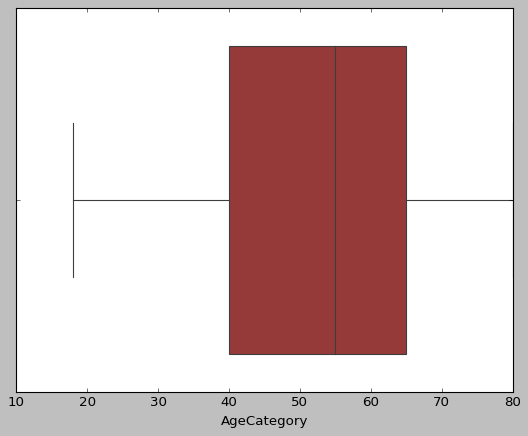

In [88]:
sns.boxplot(x=df["AgeCategory"],color="brown")
plt.show()

In [89]:
df["Race"].value_counts()

Race
White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: count, dtype: int64

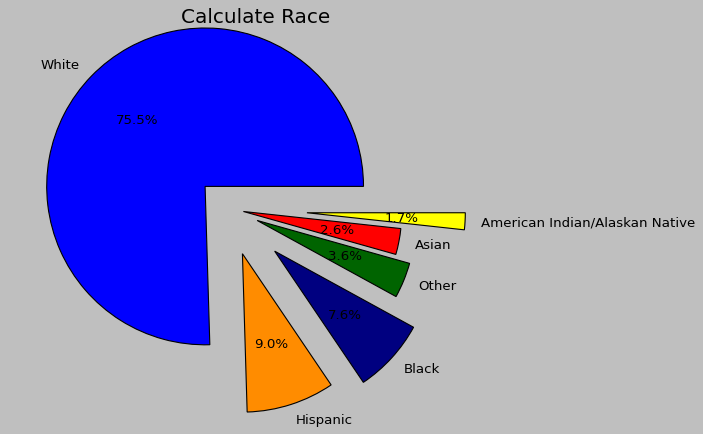

In [90]:
plt.figure(figsize=(8,6))
myexplode = [0.2,0.3,0.4,0.2,0.1,0.5]
race= df['Race'].value_counts()
plt.pie(race.values, labels=race.index, autopct= '%1.1f%%', colors=['blue','darkorange',"navy","darkgreen","red","yellow"],explode=myexplode)
plt.axis("equal")
plt.title('Calculate Race',fontsize=18)
plt.show()

In [91]:
df["Diabetic"].value_counts()

Diabetic
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: count, dtype: int64

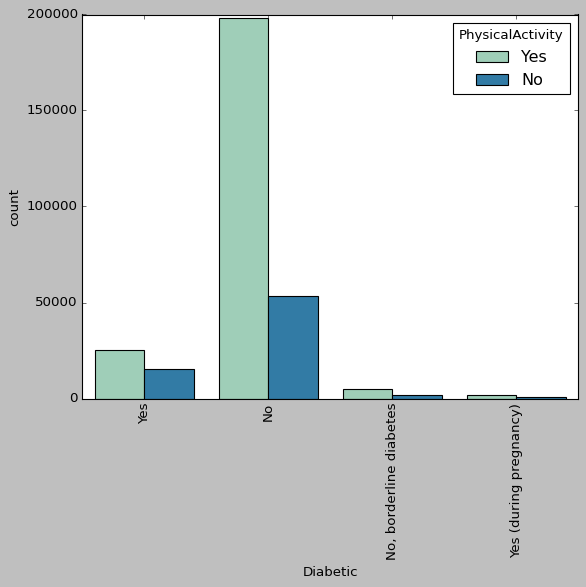

In [92]:
sns.countplot(x="Diabetic",data=df,palette="YlGnBu",hue="PhysicalActivity")
plt.xticks(rotation=90)
plt.show()

In [93]:
df["GenHealth"].value_counts()

GenHealth
Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: count, dtype: int64

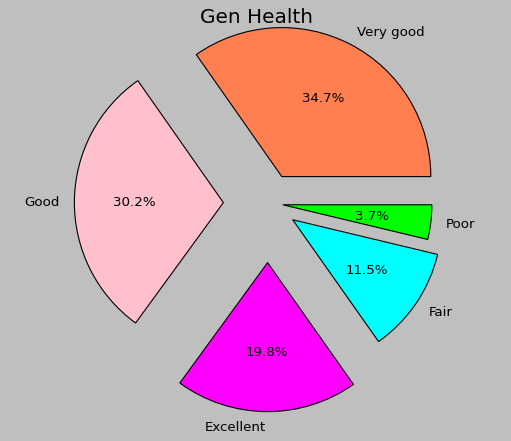

In [94]:
plt.figure(figsize=(8,6))
myexplode = [0.2,0.3,0.4,0.2,0.1]
gen= df['GenHealth'].value_counts()
plt.pie(gen.values, labels=gen.index, autopct= '%1.1f%%', colors=['coral','pink',"magenta","aqua","lime"],explode=myexplode)
plt.axis("equal")
plt.title('Gen Health',fontsize=18)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


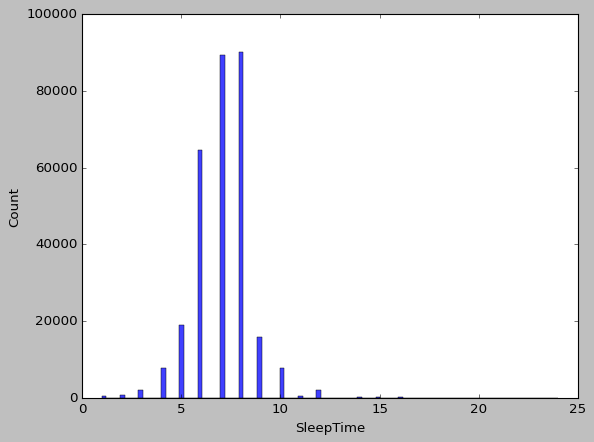

In [95]:
sns.histplot(data=df, x="SleepTime",bins=100)
plt.show()

In [96]:
df["Asthma"].value_counts()

Asthma
No     259066
Yes     42651
Name: count, dtype: int64

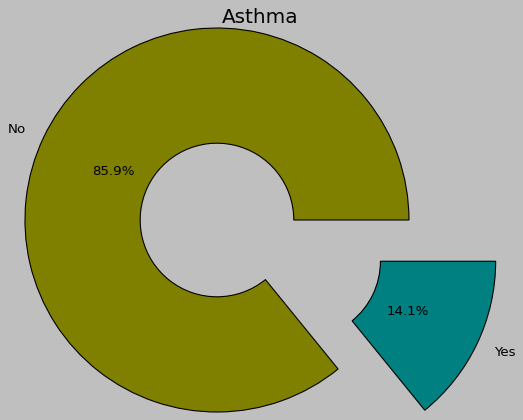

In [97]:
sleep = df["Asthma"].value_counts()
myexplode = [0.2, 0.3]

plt.pie(sleep.values, labels=sleep.index, autopct='%1.1f%%', colors=['olive', 'teal'], explode=myexplode, wedgeprops=dict(width=0.6))
plt.axis("equal")
plt.title('Asthma', fontsize=18)
plt.show()


In [98]:
df["KidneyDisease"].value_counts()

KidneyDisease
No     289941
Yes     11776
Name: count, dtype: int64

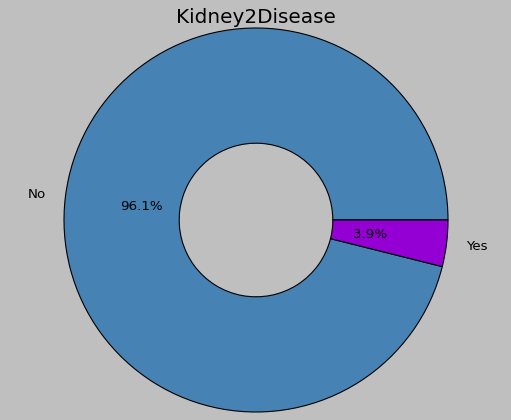

In [99]:
k = df["KidneyDisease"].value_counts()
myexplode = [0.0, 0.0]

plt.pie(k.values, labels=k.index, autopct='%1.1f%%', colors=['steelblue', 'darkviolet'], explode=myexplode, wedgeprops=dict(width=0.6))
plt.axis("equal")
plt.title('Kidney2Disease', fontsize=18)
plt.show()

In [100]:
df["SkinCancer"].value_counts()

SkinCancer
No     272425
Yes     29292
Name: count, dtype: int64

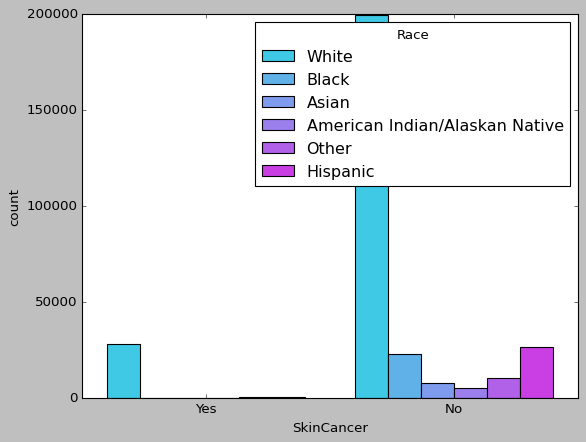

In [101]:
sns.countplot(x="SkinCancer",data=df,hue="Race",palette="cool")
plt.show()

<Figure size 800x480 with 0 Axes>

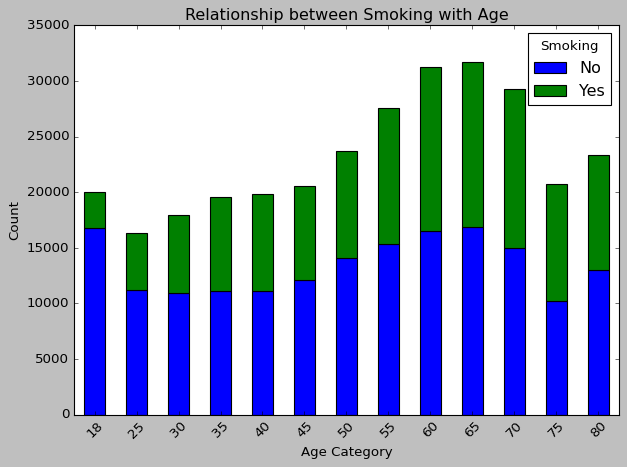

In [102]:
plt.figure(figsize=(10, 6))
grouped = df.groupby(['AgeCategory', 'Smoking']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.title('Relationship between Smoking with Age')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Smoking', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x480 with 0 Axes>

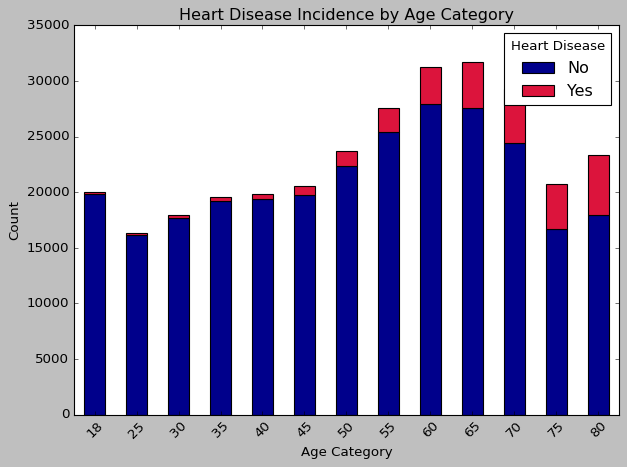

In [103]:
grouped_data = df.groupby(['AgeCategory', 'HeartDisease']).size().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, color=["darkblue", "crimson"])
plt.title('Heart Disease Incidence by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [104]:
df["HeartDisease"]=df["HeartDisease"].replace({"Yes":1,"No":0})
df["Smoking"]=df["Smoking"].replace({"Yes":1,"No":0})
df["AlcoholDrinking"]=df["AlcoholDrinking"].replace({"Yes":1,"No":0})
df["Stroke"]=df["Stroke"].replace({"Yes":1,"No":0})
df["DiffWalking"]=df["DiffWalking"].replace({"Yes":1,"No":0})
df["Sex"]=df["Sex"].replace({"Male":1,"Female":0})
df["Diabetic"]=df["Diabetic"].replace({"Yes":1,"No":0,"Yes (during pregnancy)":2,"No, borderline diabetes":3})
df["Race"]=df["Race"].replace({"White":0,"Hispanic":1,"Black":2,"Asian":3,"Other":4,"American Indian/Alaskan Native":5})
df["PhysicalActivity"]=df["PhysicalActivity"].replace({"Yes":1,"No":0})
df["GenHealth"]=df["GenHealth"].replace({"Very good":0,"Good":1,"Excellent":2,"Fair":3,"Poor":4})
df["Asthma"]=df["Asthma"].replace({"Yes":1,"No":0})
df["KidneyDisease"]=df["KidneyDisease"].replace({"Yes":1,"No":0})
df["SkinCancer"]=df["SkinCancer"].replace({"Yes":1,"No":0})

/tmp/ipykernel_3620/723019300.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["HeartDisease"]=df["HeartDisease"].replace({"Yes":1,"No":0})
/tmp/ipykernel_3620/723019300.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Smoking"]=df["Smoking"].replace({"Yes":1,"No":0})
/tmp/ipykernel_3620/723019300.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, 

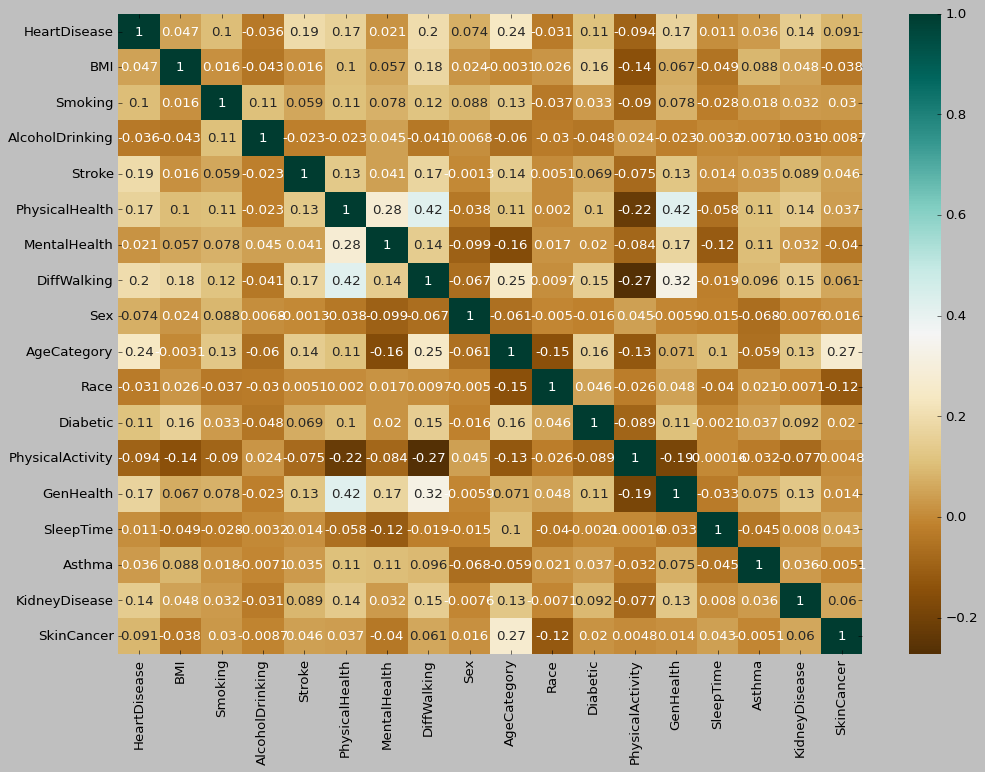

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BrBG")
plt.show()

In [106]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

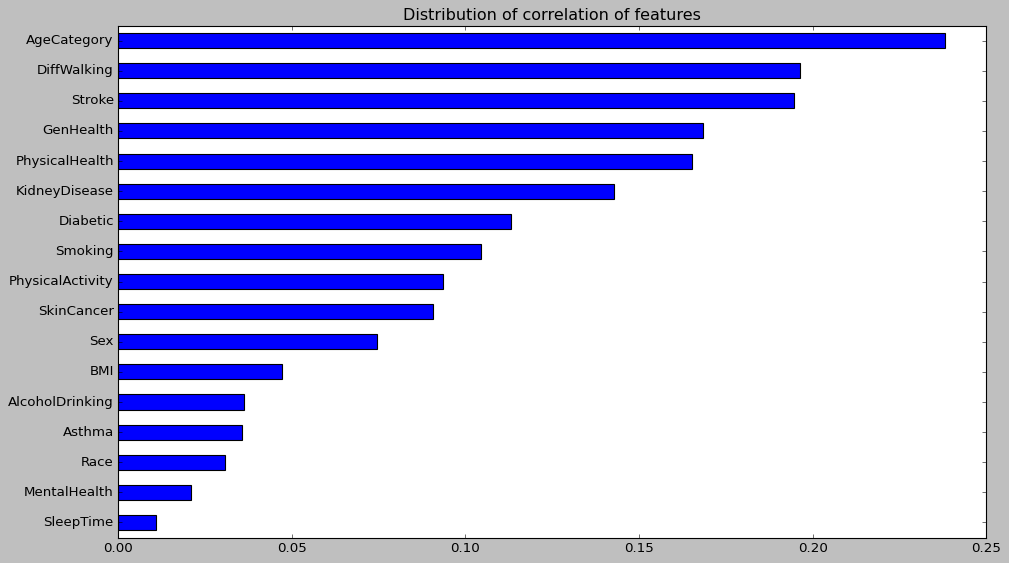

In [107]:
plt.style.use("classic")
plt.figure(figsize = (14, 8))
plt.title('Distribution of correlation of features')
abs(corr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

In [108]:
col=["BMI","PhysicalHealth","MentalHealth","AgeCategory","SleepTime"]
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
df[col]=scale.fit_transform(df[col])

In [109]:
X=df.drop(columns="HeartDisease",axis=1)
Y=df["HeartDisease"]

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [111]:
from catboost import CatBoostClassifier
cat =CatBoostClassifier(iterations=100)




In [112]:
def model_evaluation(estimator, x_test, y_test):
    from sklearn import metrics
    y_pred = estimator.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    # AUC (Area Under the Curve)
    y_pred_proba = estimator.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    cm = metrics.confusion_matrix(y_test, y_pred)
    return {'accuracy': acc, 'precision': prec, 'recall':rec, 'f1_score': f1, 'kappa':kappa,
           'fpr':fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [113]:
cat.fit(X_train,y_train)

Learning rate set to 0.5
0:	learn: 0.4281585	total: 14.9ms	remaining: 1.48s
1:	learn: 0.3286846	total: 30.9ms	remaining: 1.51s
2:	learn: 0.2834237	total: 50.4ms	remaining: 1.63s
3:	learn: 0.2620107	total: 68.3ms	remaining: 1.64s
4:	learn: 0.2497838	total: 87.1ms	remaining: 1.66s
5:	learn: 0.2435508	total: 105ms	remaining: 1.65s
6:	learn: 0.2396177	total: 126ms	remaining: 1.67s
7:	learn: 0.2373984	total: 144ms	remaining: 1.66s
8:	learn: 0.2364598	total: 163ms	remaining: 1.65s
9:	learn: 0.2355557	total: 184ms	remaining: 1.65s
10:	learn: 0.2351005	total: 202ms	remaining: 1.63s
11:	learn: 0.2346355	total: 221ms	remaining: 1.62s
12:	learn: 0.2343923	total: 239ms	remaining: 1.6s
13:	learn: 0.2342361	total: 257ms	remaining: 1.58s
14:	learn: 0.2340392	total: 274ms	remaining: 1.55s
15:	learn: 0.2338061	total: 294ms	remaining: 1.54s
16:	learn: 0.2336601	total: 313ms	remaining: 1.53s
17:	learn: 0.2335448	total: 330ms	remaining: 1.5s
18:	learn: 0.2333479	total: 349ms	remaining: 1.49s
19:	learn: 0.

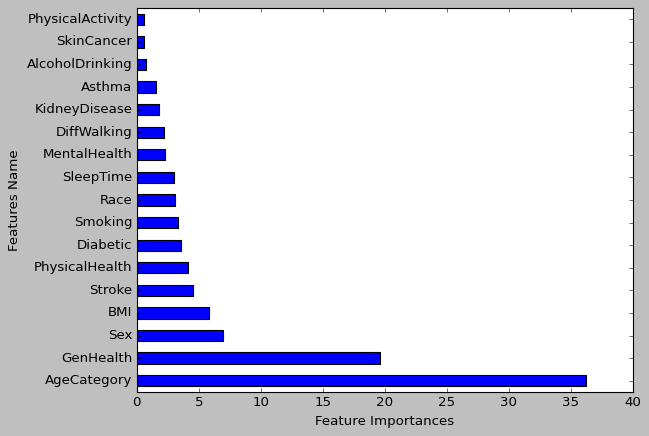

In [114]:

feat_importances = pd.Series(cat.feature_importances_, index = X.columns)
feat_importances.nlargest(len(df.columns)).plot(kind = 'barh')
plt.xlabel('Feature Importances')
plt.ylabel('Features Name')
plt.show()

In [115]:
cat_eval=model_evaluation(cat,X_test,y_test)
print('Accuracy: ', cat_eval['accuracy'])
print('Precision: ', cat_eval['precision'])
print('Recall: ', cat_eval['recall'])
print('f1_score', cat_eval['f1_score'])
print('Cohens Kappa Score: ', cat_eval['kappa'])
print('Area Under Curve: ', cat_eval['auc'])

Accuracy:  0.9100159087896063
Precision:  0.509765625
Recall:  0.09577981651376147
f1_score 0.1612604263206673
Cohens Kappa Score:  0.13659233399795967
Area Under Curve:  0.8310205974951558


# Confusion Matrix

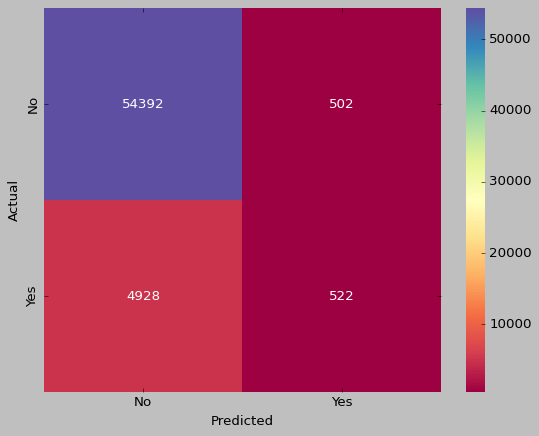

In [116]:
from sklearn.metrics import confusion_matrix, classification_report
label_name=["No","Yes"]
pred1=cat.predict(X_test)
cf=confusion_matrix(y_test,pred1)
sns.heatmap(cf,annot=True,fmt="d",cmap="Spectral",xticklabels=label_name,yticklabels=label_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report

In [117]:
print(classification_report(y_test,pred1,target_names=label_name))

              precision    recall  f1-score   support

          No       0.92      0.99      0.95     54894
         Yes       0.51      0.10      0.16      5450

    accuracy                           0.91     60344
   macro avg       0.71      0.54      0.56     60344
weighted avg       0.88      0.91      0.88     60344



# XGBClassifier

In [118]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_eval=model_evaluation(xgb,X_test,y_test)


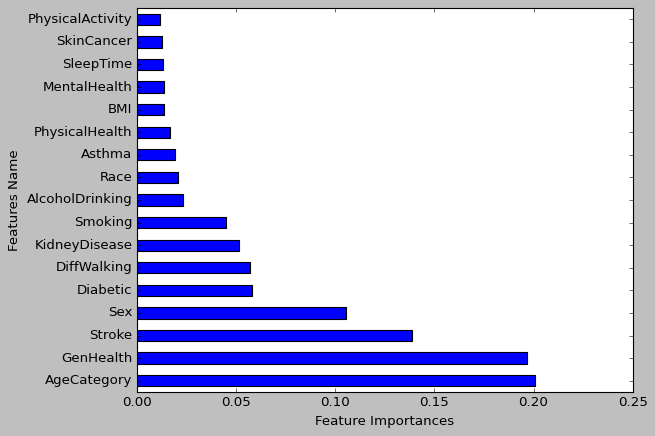

In [119]:
feat_importances = pd.Series(xgb.feature_importances_, index = X.columns)
feat_importances.nlargest(len(df.columns)).plot(kind = 'barh')
plt.xlabel('Feature Importances')
plt.ylabel('Features Name')
plt.show()

In [120]:
print('Accuracy: ', xgb_eval['accuracy'])
print('Precision: ', xgb_eval['precision'])
print('Recall: ', xgb_eval['recall'])
print('f1_score', xgb_eval['f1_score'])
print('Cohens Kappa Score: ', xgb_eval['kappa'])
print('Area Under Curve: ', xgb_eval['auc'])

Accuracy:  0.9099827654779266
Precision:  0.5085066162570888
Recall:  0.09871559633027523
f1_score 0.16533497234173322
Cohens Kappa Score:  0.14008349381643437
Area Under Curve:  0.8288812383365706


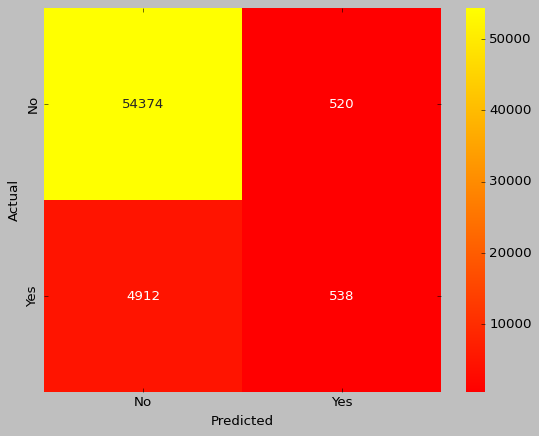

In [121]:
label_name=["No","Yes"]
pred2=xgb.predict(X_test)
cf=confusion_matrix(y_test,pred2)
sns.heatmap(cf,annot=True,fmt="d",cmap="autumn",xticklabels=label_name,yticklabels=label_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [122]:
print(classification_report(y_test,pred2,target_names=label_name))

              precision    recall  f1-score   support

          No       0.92      0.99      0.95     54894
         Yes       0.51      0.10      0.17      5450

    accuracy                           0.91     60344
   macro avg       0.71      0.54      0.56     60344
weighted avg       0.88      0.91      0.88     60344



# Compare Model Result

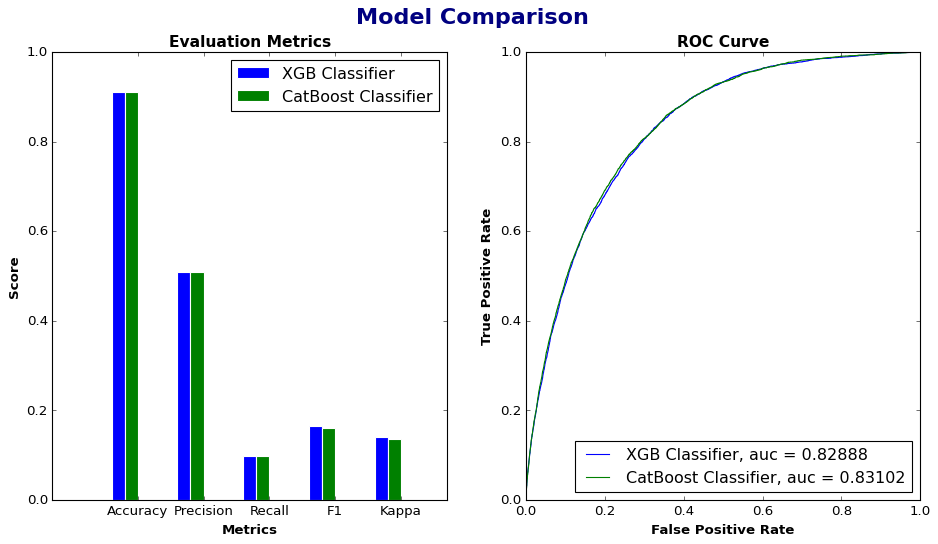

In [123]:
import numpy as np
fig,(ax1,ax2)=plt.subplots(1,2)
fig.suptitle("Model Comparison",fontsize=20,fontweight="bold",color="navy")
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# first plot

barwidth=0.2
xgb_score=[xgb_eval["accuracy"],xgb_eval["precision"],xgb_eval["recall"],xgb_eval["f1_score"],xgb_eval["kappa"]]
cat_score=[cat_eval["accuracy"],cat_eval["precision"],xgb_eval["recall"],cat_eval["f1_score"],cat_eval["kappa"]]

#set position

r1=np.arange(len(xgb_score))
r2=[x+barwidth for x in r1]

#make plot

ax1.bar(r1,xgb_score,width=barwidth,edgecolor="white",label="XGB Classifier")
ax1.bar(r2,cat_score,width=barwidth,edgecolor="white",label="CatBoost Classifier")

#configure x and y axis

ax1.set_xlabel("Metrics",fontweight="bold")
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barwidth * 1.5) for r in range(len(xgb_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

#create legend and title

ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Comparing ROC Curve
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='XGB Classifier, auc = {:0.5f}'.format(xgb_eval['auc']))
ax2.plot(cat_eval['fpr'], cat_eval['tpr'], label='CatBoost Classifier, auc = {:0.5f}'.format(cat_eval['auc']))

# Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

# Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()


# After GridSearch

In [124]:
from sklearn.model_selection import GridSearchCV
parameters = {'depth'         : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }

cat_grid = GridSearchCV(estimator=cat, param_grid = parameters, cv = 2, n_jobs=-1,scoring="accuracy")
cat_grid.fit(X_train,y_train)


0:	learn: 0.6861285	total: 75.2ms	remaining: 677ms
1:	learn: 0.6792443	total: 119ms	remaining: 474ms
2:	learn: 0.6724746	total: 158ms	remaining: 368ms
3:	learn: 0.6659079	total: 196ms	remaining: 294ms
4:	learn: 0.6594261	total: 236ms	remaining: 236ms
5:	learn: 0.6530718	total: 286ms	remaining: 191ms
6:	learn: 0.6468754	total: 327ms	remaining: 140ms
7:	learn: 0.6407783	total: 380ms	remaining: 95ms
8:	learn: 0.6348033	total: 414ms	remaining: 46ms
9:	learn: 0.6289175	total: 451ms	remaining: 0us
0:	learn: 0.6723807	total: 87.6ms	remaining: 788ms
1:	learn: 0.6526021	total: 112ms	remaining: 449ms
2:	learn: 0.6340379	total: 155ms	remaining: 362ms
3:	learn: 0.6167154	total: 185ms	remaining: 278ms
4:	learn: 0.6003597	total: 219ms	remaining: 219ms
5:	learn: 0.5847719	total: 252ms	remaining: 168ms
6:	learn: 0.5700286	total: 275ms	remaining: 118ms
7:	learn: 0.5560003	total: 300ms	remaining: 75.1ms
8:	learn: 0.5428903	total: 334ms	remaining: 37.1ms
9:	learn: 0.5302675	total: 356ms	remaining: 0us
0:

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7b92a57a4220>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             scoring='accuracy')

In [125]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",cat_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",cat_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",cat_grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9113943973141778

 The best parameters across ALL searched params:
 {'depth': 5, 'iterations': 100, 'learning_rate': 0.04}


In [126]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
cat_grid_r=cat_grid.best_estimator_
y_pred=cat_grid_r.predict(X_test)


acc0=accuracy_score(y_test,y_pred)
f10=f1_score(y_test,y_pred)
recall0=recall_score(y_test,y_pred)
precision0=precision_score(y_test,y_pred)
roc0=roc_auc_score(y_test,y_pred)

print(f"Accuracy Score : {acc0}")
print("===========================================================")
print(f"F1 score : {f10}")
print("===========================================================")
print(f"Recall score : {recall0}")
print("===========================================================")
print(f"Precision score : {precision0}")
print("===========================================================")
print(f"Roc Auc score : {roc0}")
print("===========================================================")


Accuracy Score : 0.9112090680100756
F1 score : 0.10191082802547768
Recall score : 0.05577981651376147
Precision score : 0.5891472868217055
Roc Auc score : 0.5259589139769959


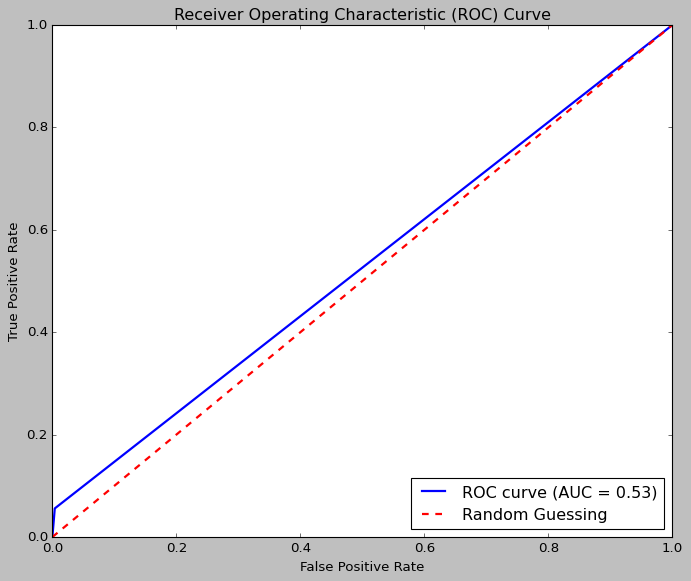

In [127]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc0))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

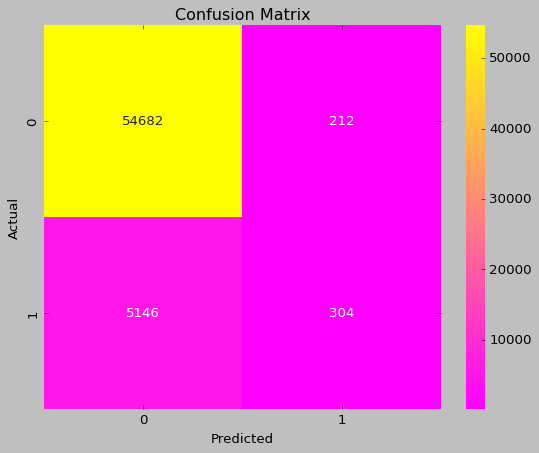

In [128]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'spring', cbar = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [129]:
print(classification_report(y_test,y_pred,target_names=label_name))

              precision    recall  f1-score   support

          No       0.91      1.00      0.95     54894
         Yes       0.59      0.06      0.10      5450

    accuracy                           0.91     60344
   macro avg       0.75      0.53      0.53     60344
weighted avg       0.88      0.91      0.88     60344



# Xgb grid search

In [130]:
params={"subsample":[0.75, 1],
        "colsample_bytree":[0.75, 1],
        "max_depth":[2, 6],
        "min_child_weight":[1, 5],
        "learning_rate":[0.1, 0.01]}
xgb_grid=GridSearchCV(estimator=xgb,param_grid=params,cv=3,scoring="accuracy")
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.75, 1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [2, 6],
                         'min_child_weight': [1, 5], 'subsample': [0.75, 1]},
             scoring='accuracy')

In [131]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",xgb_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",xgb_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",xgb_grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

 The best score across ALL searched params:
 0.9115849742212072

 The best parameters across ALL searched params:
 {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 

In [132]:
xgb_grid_r=xgb_grid.best_estimator_
y_pred1=xgb_grid_r.predict(X_test)


acc1=accuracy_score(y_test,y_pred1)
f11=f1_score(y_test,y_pred1)
recall1=recall_score(y_test,y_pred1)
precision1=precision_score(y_test,y_pred1)
roc1=roc_auc_score(y_test,y_pred1)

print(f"Accuracy Score : {acc1}")
print("===========================================================")
print(f"F1 score : {f11}")
print("===========================================================")
print(f"Recall score : {recall1}")
print("===========================================================")
print(f"Precision score : {precision1}")
print("===========================================================")
print(f"Roc Auc score : {roc1}")
print("===========================================================")


Accuracy Score : 0.9114742145035132
F1 score : 0.1265533028122956
Recall score : 0.0710091743119266
Precision score : 0.581081081081081
Roc Auc score : 0.5329633258159261


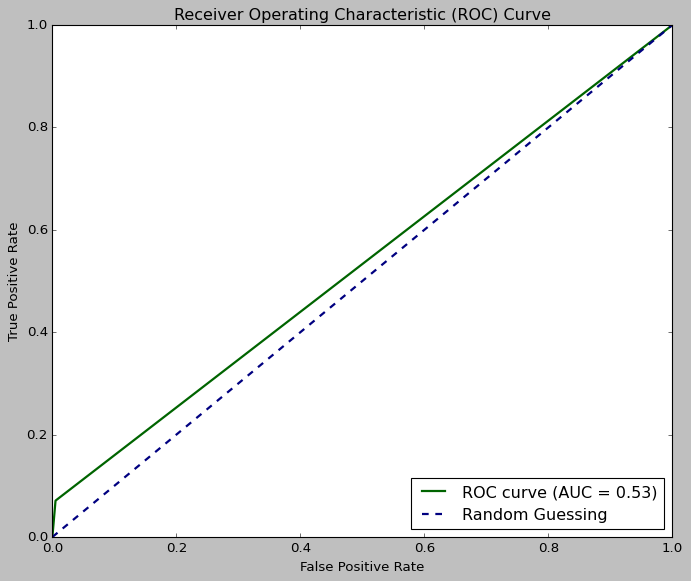

In [133]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

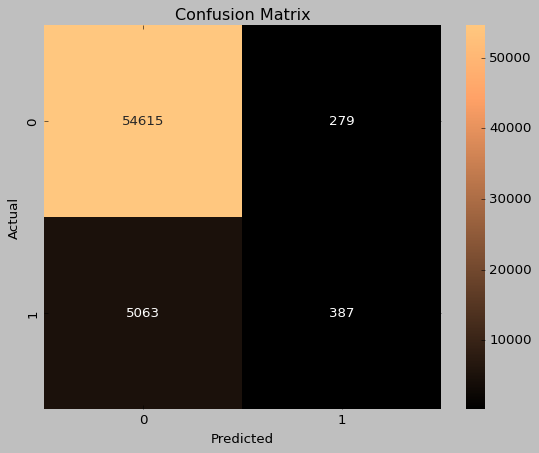

In [134]:
conf_matrix = confusion_matrix(y_test,y_pred1)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'copper', cbar = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [135]:
print(classification_report(y_test,y_pred1,target_names=label_name))

              precision    recall  f1-score   support

          No       0.92      0.99      0.95     54894
         Yes       0.58      0.07      0.13      5450

    accuracy                           0.91     60344
   macro avg       0.75      0.53      0.54     60344
weighted avg       0.88      0.91      0.88     60344



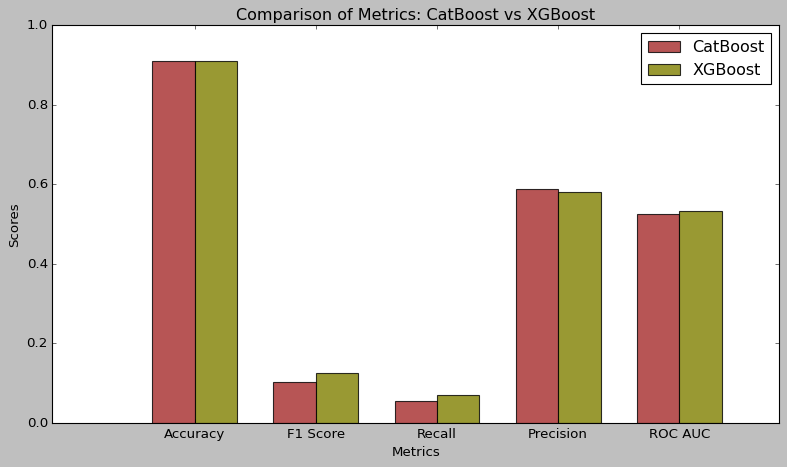

In [136]:


# Define the metrics and their scores for CatBoost and XGBoost models
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision', 'ROC AUC']
catboost_scores = [acc0, f10, recall0, precision0, roc0]
xgboost_scores = [acc1, f11, recall1, precision1, roc1]

# Set positions for bars on X-axis
x = range(len(metrics))

# Plotting the bar charts
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

# CatBoost bars
rects1 = plt.bar(x, catboost_scores, bar_width,alpha=opacity,color='brown',label='CatBoost')

# XGBoost bars
rects2 = plt.bar([p + bar_width for p in x], xgboost_scores, bar_width,alpha=opacity,color='olive',label='XGBoost')

# Adding labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Metrics: CatBoost vs XGBoost')
plt.xticks([p + bar_width/2 for p in x], metrics)
plt.legend()

plt.tight_layout()
plt.show()


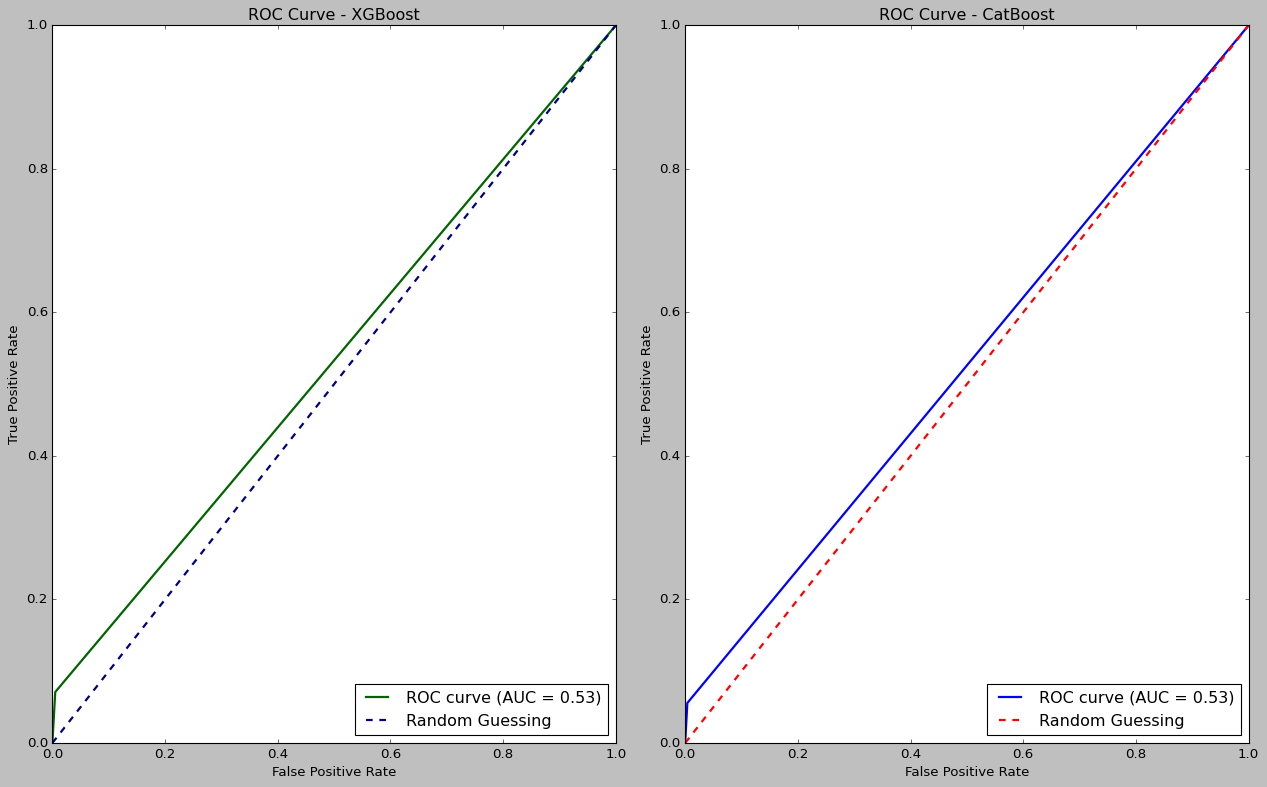

In [138]:


plt.figure(figsize=(16,10))
plt.subplot(1, 2, 1)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)
plt.plot(fpr1, tpr1, color='darkgreen', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')

# Plotting ROC curve for CatBoost
plt.subplot(1, 2, 2)
fpr0, tpr0, thresholds0 = roc_curve(y_test, y_pred)
plt.plot(fpr0, tpr0, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc0))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
